# Step 1: Convert JSON to CSV


In [2]:
import pandas as pd

with open('evaluation_results_ollama.json', 'r', encoding='utf-8') as f:
    data = pd.read_json(f)

data.to_csv('evaluation_results_ollama_csv_file.csv', index=False, encoding='utf-8')

# Step 2: Load the CSV and Perform Analysis


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, confusion_matrix, f1_score, average_precision_score

df = pd.read_csv('evaluation_results_ollama_csv_file.csv')

df.head()

,category,query,ground_truth,top_5_documents,document_similarities,best_match_document,best_match_similarity,accuracy,recall
0,Art and Music,من هو لودفيج فان بيتهوفن، وما هي بعض أعماله ال...,لودفيج فان بيتهوفن هو مؤلف موسيقي ألماني ولد ع...,['أحب teasingك بشأن لودفيغ فان بيتهوفن، ومستBu...,"[0.692608974195007, 0.0, 0.0, 0.0, 0.0]",أحب teasingك بشأن لودفيغ فان بيتهوفن، ومستBusy...,0.692609,0.2,1
1,Art and Music,ما هي آلة الناي، وكيف يتم العزف عليها؟,الناي هي آلة نفخية تعد من أقدم الآلات الموسيقي...,['آلة الناي تعتبر عدة إصدارات من الآلات السنوي...,"[0.750667468877321, 0.0, 0.0, 0.0, 0.0]",آلة الناي تعتبر عدة إصدارات من الآلات السنوية،...,0.750667,0.2,1
2,Art and Music,ما هي آلة العود، وما هو تاريخها؟,العود هي آلة موسيقية شرقية وترية يعود تاريخها ...,['حسناً أعد تفصلا أكثر حول الآلة العدالة: هي آ...,"[0.696321394530796, 0.6654968717946771, 0.0, 0...",حسناً أعد تفصلا أكثر حول الآلة العدالة: هي آلة...,0.696321,0.4,1
3,Art and Music,من هو الخطاط فريد العلي، وما هي إسهاماته في ال...,فريد العلي هو خطاط كويتي معروف بعمله في الخط ا...,['هذا لا يزalingة من حياتك السابقة حيث حصلت عل...,"[0.7610744888414841, 0.0, 0.0, 0.0, 0.0]",هذا لا يزalingة من حياتك السابقة حيث حصلت على ...,0.761074,0.2,1
4,Art and Music,ما هي أبرز أعمال المصمم اللبناني بسيل سودة؟,بسيل سودة هو مصمم أزياء لبناني قدم عروضاً ناجح...,['إليك تفاصيل عظيمة حول سيد سلويون سودة وهي مص...,"[0.7310923851837161, 0.0, 0.0, 0.0, 0.0]",إليك تفاصيل عظيمة حول سيد سلويون سودة وهي مصمم...,0.731092,0.2,1


# Step 3: Calculate Metrics
### Accuracy and Recall :

In [4]:

category_metrics = df.groupby('category').agg({
    'accuracy': 'mean',
    'recall': 'mean'
}).reset_index()
category_metrics.columns=["Category","Precision","Recall"]
print("Ollama:")

category_metrics



Ollama:


,Category,Precision,Recall
0,Art and Music,0.240000,1.0
1,Education,0.240000,1.0
2,Environment,0.330000,1.0
3,Finance,0.338462,1.0
4,Health,0.100000,0.5
5,Politics,0.160000,0.8
6,Religion,0.140000,0.7
7,Science And Technology,0.100000,0.5
8,Sport,0.140000,0.7
9,Tourism,0.240000,1.0


### F1 Score :


In [5]:

df['f1_score'] = 2 * (df['accuracy'] * df['recall']) / (df['accuracy'] + df['recall'])

overall_mean_f1 = df['f1_score'].mean()

category_f1 = df.groupby('category')['f1_score'].mean().reset_index()

print("Ollama:")
print(category_f1)
print("\nOverall Mean F1 Score:", overall_mean_f1)


Ollama:
                 category  f1_score
0           Art and Music  0.380952
1               Education  0.375000
2             Environment  0.462897
3                 Finance  0.459402
4                  Health  0.333333
5                Politics  0.333333
6                Religion  0.333333
7  Science And Technology  0.333333
8                   Sport  0.333333
9                 Tourism  0.380952

Overall Mean F1 Score: 0.39170634920634934


# Step 4: Visualizations :
### Accuracy and Recall by Category:


In [6]:
categories = category_metrics['category']
Precision = category_metrics['Precision']
recall = category_metrics['Recall']

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Precision, width, label='Precision')
rects2 = ax.bar(x + width/2, recall, width, label='Recall')

ax.set_xlabel('Categories')
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall by Category - Ollama')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend()

fig.tight_layout()
plt.show()

KeyError: 'category'

### F1 Score by Category :


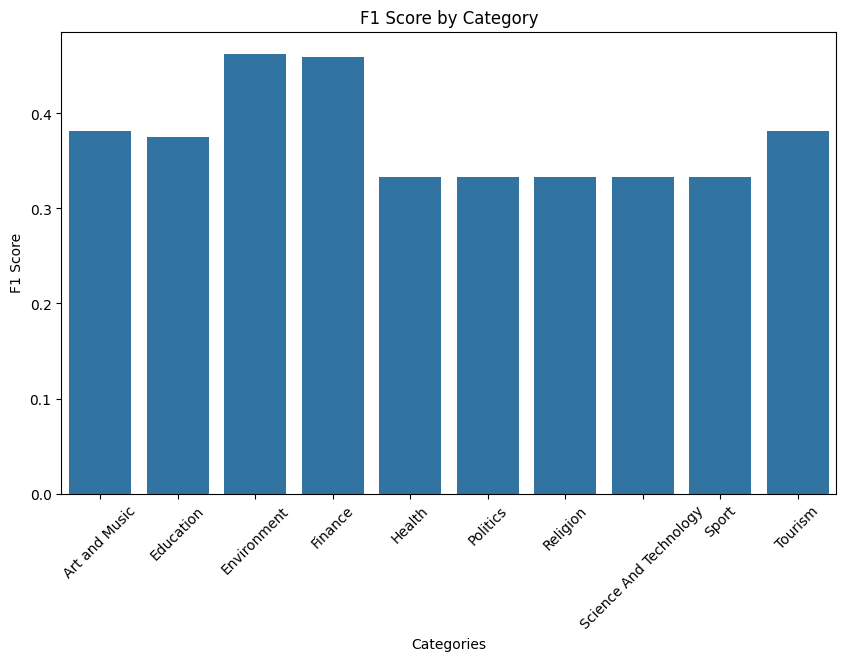

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='f1_score', data=category_f1)
plt.xlabel('Categories')
plt.ylabel('F1 Score')
plt.title('F1 Score by Category')
plt.xticks(rotation=45)
plt.show()

### Distribution of Best Match Similarity Scores :

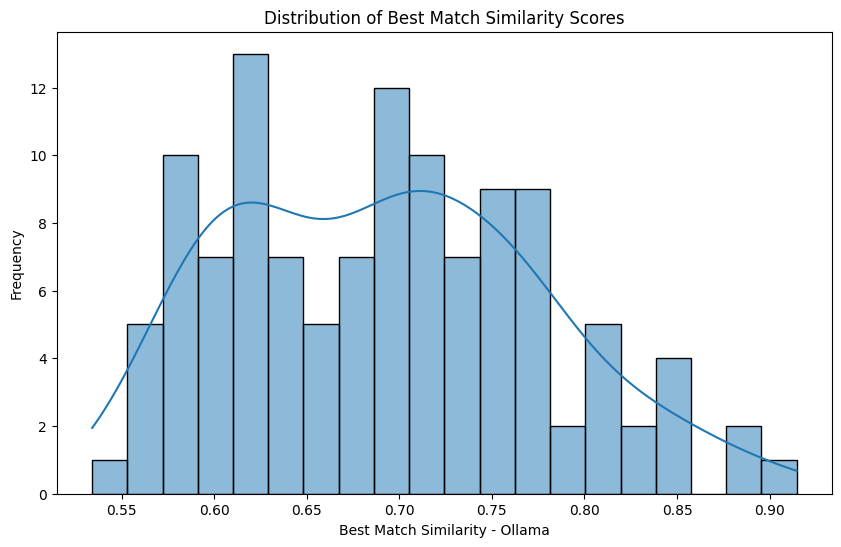

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['best_match_similarity'], bins=20, kde=True)
plt.title('Distribution of Best Match Similarity Scores')
plt.xlabel('Best Match Similarity - Ollama')
plt.ylabel('Frequency')
plt.show()